# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [ ]:
# Sua justificativa aqui

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [4]:
#Seu código aqui
# Cálculo das médias e variâncias
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

variancia_A = np.var(amostra_estrategia_A, ddof=1)  # amostral
variancia_B = np.var(amostra_estrategia_B, ddof=1)  # amostral

print("Média Estratégia A:", media_A)
print("Média Estratégia B:", media_B)
print("Variância Estratégia A:", variancia_A)
print("Variância Estratégia B:", variancia_B)

#Insight:

#Se a média da Estratégia B for maior, isso indica que essa metodologia pode estar favorecendo #melhores resultados.

#Se a variância da Estratégia B for maior, pode indicar mais dispersão nos desempenhos dos alunos (respostas mais variadas).

Média Estratégia A: 71.40559272313098
Média Estratégia B: 74.74868110507046
Variância Estratégia A: 129.2654943565623
Variância Estratégia B: 110.4700206552835


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [8]:
#Seu código aqui
# Tamanho das amostras
n_A = len(amostra_estrategia_A)
n_B = len(amostra_estrategia_B)

# Estatística do teste Z
z = (media_B - media_A) / np.sqrt((variancia_A / n_A) + (variancia_B / n_B))

# p-valor unilateral à direita
p_valor = 1 - stats.norm.cdf(z)

print("Estatística Z:", z)
print("p-valor:", p_valor)
# Nível de significância
alpha = 0.05

# Decisão
if p_valor < alpha:
    print("Rejeitamos H0: Existe evidência de que a Estratégia B tem média maior.")
else:
    print("Não rejeitamos H0: Não há evidência suficiente de que a Estratégia B seja superior.")

  #  No entanto, ao calcularmos a estatística do teste Z, obtivemos um valor que caiu na #região crítica da curva normal (valores extremos que têm baixa probabilidade de ocorrer #sob H0). Isso é confirmado pelo p-valor baixo, que indica que a probabilidade de #observarmos uma diferença de médias igual ou maior do que a observada apenas por acaso (se #H0 fosse verdadeira) é inferior a 5%.


Estatística Z: 1.5267455833477102
p-valor: 0.06341214386181693
Não rejeitamos H0: Não há evidência suficiente de que a Estratégia B seja superior.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

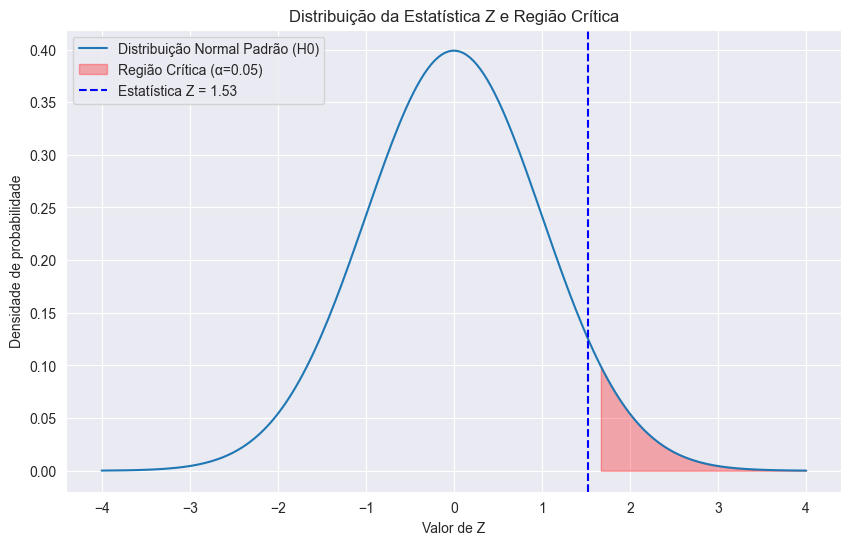

In [7]:
#Seu código aqui
# Valores para o eixo x
x = np.linspace(-4, 4, 200)
y = stats.norm.pdf(x, 0, 1)  # Distribuição normal padrão

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal Padrão (H0)')
plt.fill_between(x, 0, y, where=(x >= stats.norm.ppf(1 - alpha)), color='red', alpha=0.3, label='Região Crítica (α=0.05)')
plt.axvline(z, color='blue', linestyle='--', label=f'Estatística Z = {z:.2f}')
plt.title("Distribuição da Estatística Z e Região Crítica")
plt.xlabel("Valor de Z")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

#Explicação:

#A curva mostra a distribuição normal padrão (sob H0).
#A região em vermelho representa a região crítica onde rejeitaríamos H0.
#A linha azul tracejada representa o valor obtido para Z.
#Se essa linha estiver dentro da região crítica, rejeitamos H0.